### Preprocessing and Exploration of the Data Set

In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/Users/rea/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Train-Val-Test-Split = 0.9000093536619587: 0.049995323169020674 : 0.049995323169020674:


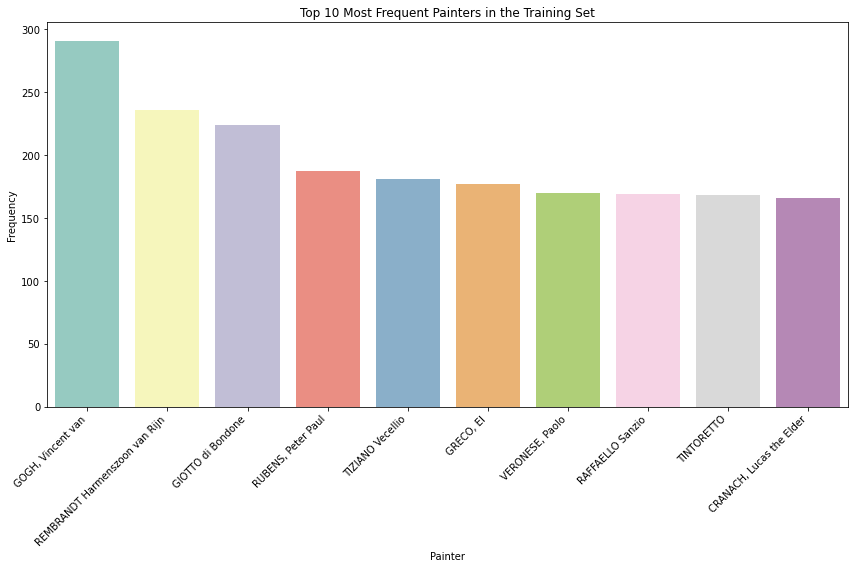

The three data sets have different 10 most frequent painters:

Training data: ['CRANACH, Lucas the Elder', 'GIOTTO di Bondone', 'GOGH, Vincent van', 'GRECO, El', 'RAFFAELLO Sanzio', 'REMBRANDT Harmenszoon van Rijn', 'RUBENS, Peter Paul', 'TINTORETTO', 'TIZIANO Vecellio', 'VERONESE, Paolo']

Validation data: ['CRANACH, Lucas the Elder', 'GIOTTO di Bondone', 'GOGH, Vincent van', 'GRECO, El', 'REMBRANDT Harmenszoon van Rijn', 'RUBENS, Peter Paul', 'TIZIANO Vecellio', 'UNKNOWN MASTER, Italian', 'VELÁZQUEZ, Diego Rodriguez de Silva y', 'VERONESE, Paolo']

Test data: ['ANGELICO, Fra', 'CRANACH, Lucas the Elder', 'DEGAS, Edgar', 'GIOTTO di Bondone', 'GOGH, Vincent van', 'MANTEGNA, Andrea', 'REMBRANDT Harmenszoon van Rijn', 'RUBENS, Peter Paul', 'TIZIANO Vecellio', 'UNKNOWN MASTER, Italian']



,IMAGE_FILE,DESCRIPTION,AUTHOR,TITLE,TECHNIQUE,DATE,TYPE,SCHOOL,TIMEFRAME
0,19873-1darmst.jpg,"The Meyer or Darmstadt Madonna is the last, mo...","HOLBEIN, Hans the Younger",Darmstadt Madonna,"Oil on limewood, 147 x 102 cm",1526 and after 1528,religious,German,1501-1550
1,18759-guard301.jpg,Whereas Canaletto incorporates classically ins...,"GUARDI, Francesco",Landscape with a Fisherman's Tent,"Oil on canvas, 49 x 77 cm",1770-75,landscape,Italian,1751-1800
2,04589-temptati.jpg,In this painting the refinement of the colouri...,"BILIVERT, Giovanni",The Temptation of Charles and Ubalde,"Oil on copper, 37 x 28 cm",1629-30,religious,Italian,1601-1650
3,15104-magi.jpg,"The left side of the painting was cut, origina...",GEERTGEN tot Sint Jans,Adoration of the Magi,"Panel, 111 x 69 cm",1480-85,religious,Netherlandish,1451-1500
4,36582-paolo_f1.jpg,The painting illustrates a famous episode from...,"SCHEFFER, Ary",The Ghosts of Paolo and Francesca Appear to Da...,"Oil on canvas, 167 x 234 cm",1835,other,Dutch,1801-1850


In [2]:
# load data

# directory where semArt data is stored
BASE_DIR = "/Users/rea/Library/Mobile Documents/com~apple~CloudDocs/MSc_IT_and_Cognition/springsemester2024/ComputationalCognitiveScienceII/Exam/Project/MM_Painting_Classification"

train_df = pd.read_csv(os.path.join(BASE_DIR, "SemArt/semart_train.csv"), encoding='iso-8859-1', sep='\t')
val_df = pd.read_csv(os.path.join(BASE_DIR, "SemArt/semart_val.csv"), encoding='iso-8859-1', sep='\t')
test_df = pd.read_csv(os.path.join(BASE_DIR, "SemArt/semart_test.csv"), encoding='iso-8859-1', sep='\t')

# keep the whole dataframe for investigations
train_df_all_columns = train_df
val_df_all_columns = val_df
test_df_all_columns = test_df

# keep split from original data set 
total_data = len(train_df) + len(val_df) + len(test_df)
print(f"Train-Val-Test-Split = {len(train_df)/total_data}: {len(val_df)/total_data} : {len(test_df)/total_data}:")


# plot the 10 most frequent painters

painter_counts = train_df['AUTHOR'].value_counts() # count occurrences of each painter
top_10_painters = painter_counts.head(10) # select top 10 painters

palette = sns.diverging_palette(145, 300, s=60, l=70, n=len(top_10_painters))
palette2 = "Set3"

plt.figure(figsize=(12, 8))
sns.barplot(x=top_10_painters.index, y=top_10_painters.values, palette=palette2)
plt.title('Top 10 Most Frequent Painters in the Training Set')
plt.xlabel('Painter')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Are the 10 most frequent painters are the same in all three data sets? 
if not sorted(train_df['AUTHOR'].value_counts().head(10).index.tolist()) == sorted(val_df['AUTHOR'].value_counts().head(10).index.tolist()) == sorted(test_df['AUTHOR'].value_counts().head(10).index.tolist()):
    print("The three data sets have different 10 most frequent painters:")
    print()
print(f"Training data: {sorted(train_df['AUTHOR'].value_counts().head(10).index.tolist())}")
print()
print(f"Validation data: {sorted(val_df['AUTHOR'].value_counts().head(10).index.tolist())}")
print()
print(f"Test data: {sorted(test_df['AUTHOR'].value_counts().head(10).index.tolist())}")
print()
train_df.head()

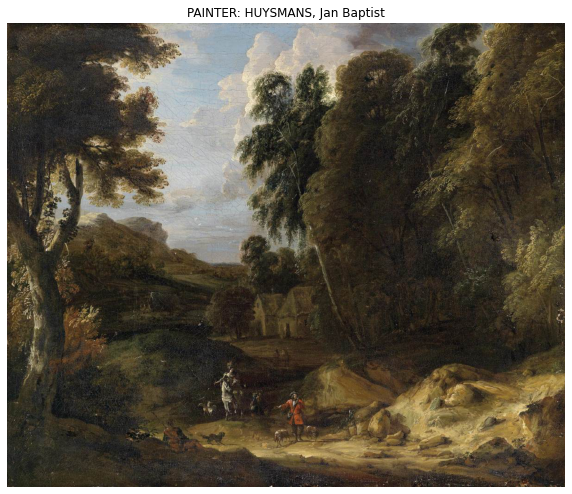

(1000, 1203, 3)
DESCRIPTION: The painting represents a mountain landscape with a hunting party


In [3]:
import cv2
from skimage.io import imshow
from skimage.io import imread


image_path = os.path.join(BASE_DIR, 'SemArt/Images', train_df['IMAGE_FILE'].iloc[10]) # path to the 11th image in training set
plt.figure(figsize=(10, 10)) 
image = plt.imread(image_path)
plt.imshow(image)
plt.title(f"PAINTER: {train_df['AUTHOR'].iloc[10]}")
plt.axis('off')
plt.show()

print(image.shape)
print(f"DESCRIPTION: {train_df['DESCRIPTION'].iloc[10]}")

### Undersampling regarding the 10th most frequent painter in all data sets (Balancing classes)

Because the most frequent painters are not the same, we concatenate the data sets, sample for the 10 most frequent painters in total, undersample for the least frequent painter of these 10, and then split the data into training, validation, and test set. Undersampling rather than oversampling by data augmentation was chosen due to computational complexity and limited computing ressources.

In [4]:
combined_df = pd.concat([train_df, val_df, test_df], ignore_index=True) # combine data frames

combined_df.dropna(inplace=True) # drop nan

painter_counts = combined_df['AUTHOR'].value_counts()
print(painter_counts[:10])
print()
top_10_painters = painter_counts.head(10).index.tolist() # get ten most frequent painters
print()
least_frequent_10 = top_10_painters[-1] # get least frequent painter of these 10
print("Least frequent painter: ",least_frequent_10, "\n")

combined_df = combined_df[combined_df['AUTHOR'].isin(top_10_painters)] # drop all other painters

min_count = painter_counts[least_frequent_10] # get count of least frequent painter

undersampled_df = pd.DataFrame()

# undersample each of the top 10 painters to have the same number of samples as the least frequent painter
for painter in top_10_painters:
    painter_df = combined_df[combined_df['AUTHOR'] == painter].sample(n=min_count, random_state=42)
    undersampled_df = pd.concat([undersampled_df, painter_df])

undersampled_df = undersampled_df.sample(frac=1, random_state=42).reset_index(drop=True) # reset index and shuffle

painter_counts_bal = undersampled_df['AUTHOR'].value_counts() # get new painter counts
print(f"New Painter Counts after undersampling: \n \n {painter_counts_bal[:10]}") # did not work

print(len(undersampled_df)) # only 1990 data points in total
undersampled_df.head()

GOGH, Vincent van                 327
REMBRANDT Harmenszoon van Rijn    262
GIOTTO di Bondone                 249
RUBENS, Peter Paul                213
TIZIANO Vecellio                  205
GRECO, El                         192
CRANACH, Lucas the Elder          190
VERONESE, Paolo                   187
UNKNOWN MASTER, Italian           179
TIEPOLO, Giovanni Battista        178
Name: AUTHOR, dtype: int64


Least frequent painter:  TIEPOLO, Giovanni Battista 

New Painter Counts after undersampling: 
 
 TIEPOLO, Giovanni Battista        178
VERONESE, Paolo                   178
GRECO, El                         178
CRANACH, Lucas the Elder          178
RUBENS, Peter Paul                178
TIZIANO Vecellio                  178
GIOTTO di Bondone                 178
GOGH, Vincent van                 178
REMBRANDT Harmenszoon van Rijn    178
UNKNOWN MASTER, Italian           178
Name: AUTHOR, dtype: int64
1780


,IMAGE_FILE,DESCRIPTION,AUTHOR,TITLE,TECHNIQUE,DATE,TYPE,SCHOOL,TIMEFRAME
0,39020-4americ1.jpg,The personification of the American Continent ...,"TIEPOLO, Giovanni Battista","Apollo and the Continents (America, left-hand ...",Fresco,1752-53,mythological,Italian,1701-1750
1,42949-3ceilin4.jpg,The eight figures of the Virtues can be identi...,"VERONESE, Paolo",Moderation,"Oil on canvas, 160 x 160 cm",1578-82,mythological,Italian,1551-1600
2,18361-1512grec.jpg,The painting is signed 'doménikos theotokópoul...,"GRECO, El",Portrait of a Gentleman,"Oil on canvas, 64 x 51 cm",1600-05,portrait,Spanish,1551-1600
3,10341-2bocca1.jpg,"La Bocca della Verit&#224; (in English, ""the M...","CRANACH, Lucas the Elder",The Bocca della Verit?,"Oil and tempera on red beechwood, 111 x 100 cm",1525-27,other,German,1501-1550
4,39008-24labia.jpg,Along the cornice that delimits the lower edge...,"TIEPOLO, Giovanni Battista",Nobility Conquering Envy,Fresco,1743-50,mythological,Italian,1701-1750


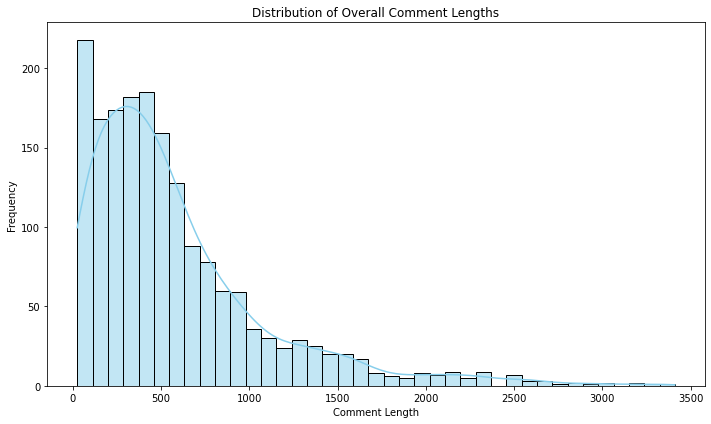

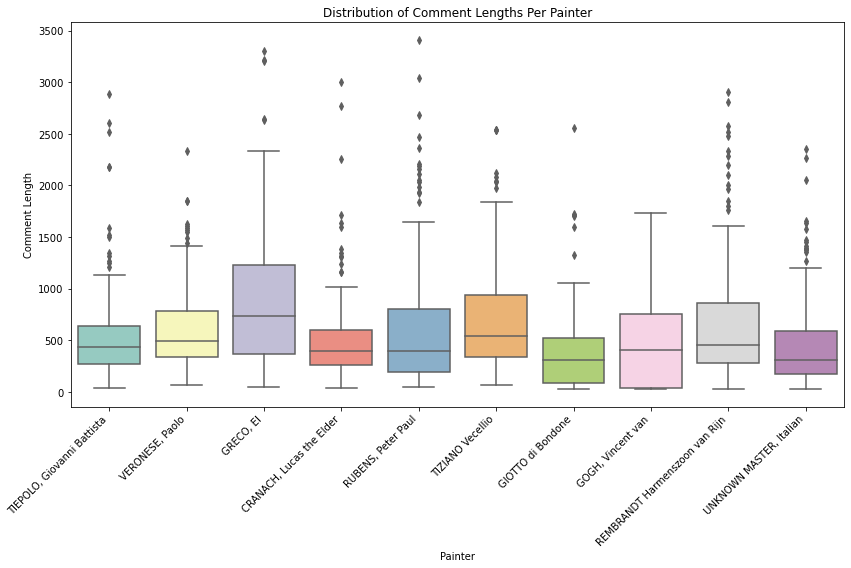

In [5]:
# show comment length distribution for undersampled df

undersampled_df['comment_length'] = undersampled_df['DESCRIPTION'].apply(lambda x: len(str(x)))

# plot the overall distribution
plt.figure(figsize=(10, 6))
sns.histplot(undersampled_df['comment_length'], kde=True, color='skyblue')
plt.title('Distribution of Overall Comment Lengths')
plt.xlabel('Comment Length')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# plot distribution of comment lengths per 10 most frequent painters
specific_painters = top_10_painters
specific_painters_df = undersampled_df[undersampled_df['AUTHOR'].isin(specific_painters)]

plt.figure(figsize=(12, 8))
sns.boxplot(x='AUTHOR', y='comment_length', data=specific_painters_df, palette='Set3')
plt.title('Distribution of Comment Lengths Per Painter')
plt.xlabel('Painter')
plt.ylabel('Comment Length')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Some comments are very long but generally for the ten painters chosen the distribution does not differ too much if we truncate the comments to the maximal number of tokens allowed by BERT (512).

#### Explore distributions of TYPE, SCHOOL, and TIMEFRAME in combined original df and the balanced data set

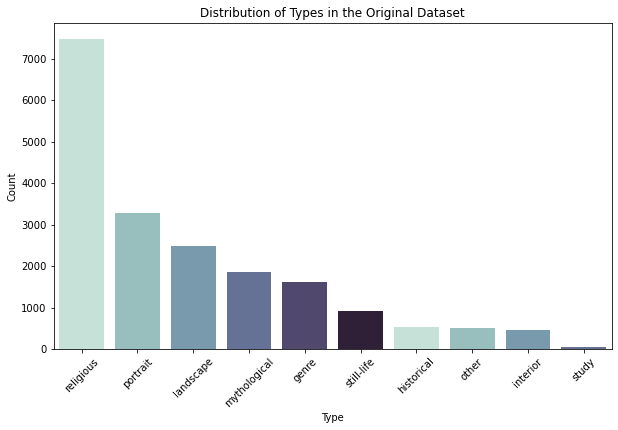

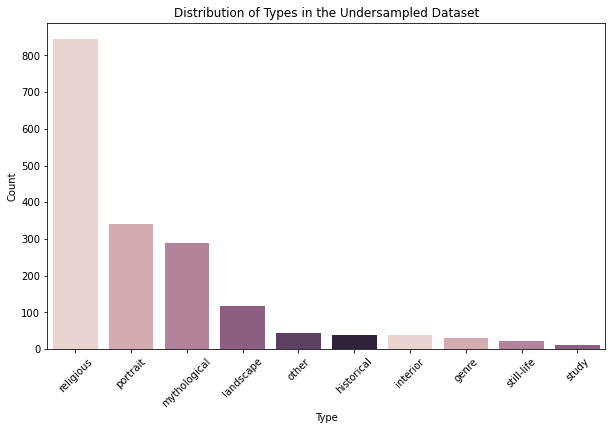

In [9]:
# check the distribution of TYPE, SCHOOL, and TIMEFRAME in the combined orignal df (train, val, and test together) and undersampled_df

combined_df_all_columns = pd.concat([train_df_all_columns, val_df_all_columns, test_df_all_columns], ignore_index=True)

palette_org = sns.cubehelix_palette(start=.5, rot=-.5)
palette_bal = sns.cubehelix_palette()

# check distribution of TYPE 
# in original data set
type_counts = train_df_all_columns['TYPE'].value_counts()

# plot as a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=type_counts.index, y=type_counts, palette=palette_org)
plt.title('Distribution of Types in the Original Dataset')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# in undersampled data set
type_counts = undersampled_df['TYPE'].value_counts()

# plot as a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=type_counts.index, y=type_counts, palette=palette_bal)
plt.title('Distribution of Types in the Undersampled Dataset')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


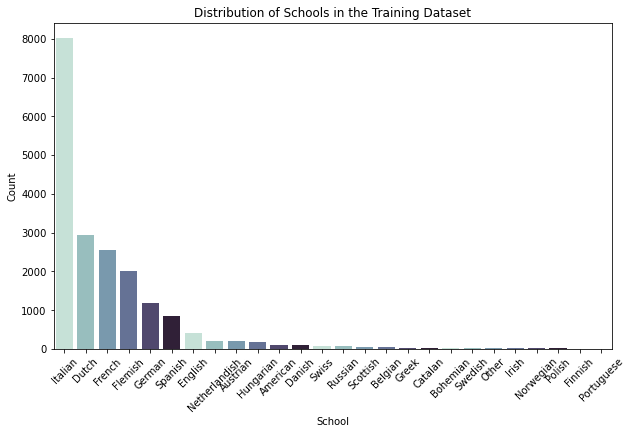

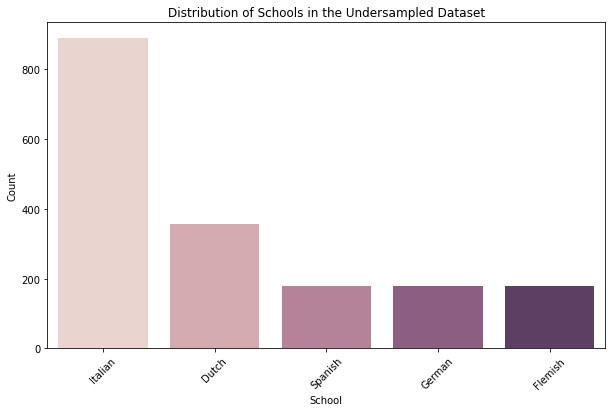

In [10]:
# check the distribution of SCHOOL
# in original data
school_counts = train_df_all_columns['SCHOOL'].value_counts()

# plot as a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=school_counts.index, y=school_counts, palette=palette_org)
plt.xlabel('School')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.title('Distribution of Schools in the Training Dataset')
plt.show()

# in undersampled data set
school_counts = undersampled_df['SCHOOL'].value_counts()

# plot as a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=school_counts.index, y=school_counts, palette=palette_bal)
plt.xlabel('School')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.title('Distribution of Schools in the Undersampled Dataset')
plt.show() 

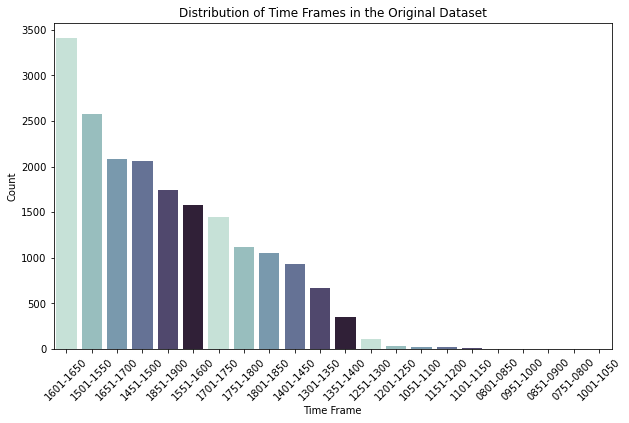

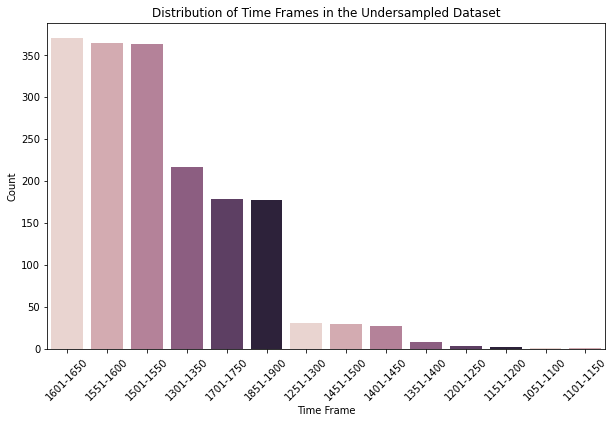

In [11]:

# check the distribution of TIMEFRAME

time_counts = train_df_all_columns['TIMEFRAME'].value_counts()

# plot as a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=time_counts.index, y=time_counts, palette=palette_org)
plt.xlabel('Time Frame')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.title('Distribution of Time Frames in the Original Dataset')
plt.show()

# in undersampled data set
time_counts = undersampled_df['TIMEFRAME'].value_counts()

# plot as a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=time_counts.index, y=time_counts, palette=palette_bal)
plt.xlabel('Time Frame')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.title('Distribution of Time Frames in the Undersampled Dataset')
plt.show() 

### Train-Val-Test split

In [70]:
from sklearn.model_selection import train_test_split

# split the data into training and remaining data
train_data, remaining_data = train_test_split(undersampled_df, test_size=0.1, random_state=42)

# Then, split the remaining data into validation and test sets
val_data, test_data = train_test_split(remaining_data, test_size=0.5, random_state=42)

# check split ratio
total_data = len(train_data) + len(val_data) + len(test_data)
print(f"Train-Val-Test-Split = {len(train_data)/total_data}: {len(val_data)/total_data} : {len(test_data)/total_data}")

# reset indexes
train_data.reset_index(drop=True, inplace=True)
val_data.reset_index(drop=True, inplace=True)
test_data.reset_index(drop=True, inplace=True)

Train-Val-Test-Split = 0.9: 0.05 : 0.05


In [72]:
train_data.head()

#keep only image file, description, and author
train_data = train_data.iloc[:, :3]
val_data = val_data.iloc[:, :3]
test_data = test_data.iloc[:, :3]

train_data.head()

,IMAGE_FILE,DESCRIPTION,AUTHOR
0,16346-virtu_4.jpg,The figures of Justice and Injustice are large...,GIOTTO di Bondone
1,16980-2hague03.jpg,"Catalogue numbers: F 4, JH 187.In the years 18...","GOGH, Vincent van"
2,33896-11noremb.jpg,Catalogue number: Bredius 109.Rembrandt's life...,REMBRANDT Harmenszoon van Rijn
3,35604-06landsc.jpg,Saint George and the Dragon symbolises the clo...,"RUBENS, Peter Paul"
4,39730-6perseus.jpg,This painting is one of the six 'poesie' paint...,TIZIANO Vecellio


### Truncate comment descriptions to 512 characters (BERT has limit of 512 token)

In [8]:
max_length = 512

datasets = [train_data, val_data, test_data]
for df in datasets:
    df.loc[:,'DESCRIPTION'] = df.loc[:,'DESCRIPTION'].apply(lambda x: x[:max_length])


max_length = train_data['DESCRIPTION'].str.len().max()
min_length = train_data['DESCRIPTION'].str.len().min()

print("Maximum length of description column:", max_length)
print("Minimum length of description column:", min_length) 

Maximum length of description column: 512
Minimum length of description column: 26


/Users/rea/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


### NER to mask painters's names

In [9]:
#!pip install spacy
#!python -m spacy download en_core_web_sm
import spacy
from spacy import displacy

# some preliminary tests
text = "Morazzone's characteristic style is fully developed in his frescoes in the chapels of Sacro Monte of Varese and Sacro Monte of Varallo."
# Load English tokenizer, tagger, parser, and NER
nlp = spacy.load("en_core_web_sm")
doc = nlp(text)

displacy.render(doc, style="ent", jupyter=True)

This is not working well... We have a lot of painters with a not English sounding surname, so the NER does not perform well. Here, Morazzone is labeled as an ORG, even though it is the painters name.

In [10]:
# some random tests for other comments:
sample_NER = undersampled_df.sample(n=10)
counter = 1
for index,row in sample_NER.iterrows():
    text = row["DESCRIPTION"]
    painter = row["AUTHOR"]
    doc = nlp(text)
    print(f"{counter}. {painter}: ")
    counter += 1
    displacy.render(doc, style="ent", jupyter=True)
    

1. UNKNOWN MASTER, Italian: 


2. VERONESE, Paolo: 


3. GIOTTO di Bondone: 


4. GIOTTO di Bondone: 


5. REMBRANDT Harmenszoon van Rijn: 


6. UNKNOWN MASTER, Italian: 


7. GRECO, El: 


8. GIOTTO di Bondone: 


9. RUBENS, Peter Paul: 


10. UNKNOWN MASTER, Italian: 


Conclusion: If the label is "GRECO,El", usually in the comment the name is mentioned as "El Greco" (similarly "CRANACH, Lucas the Elder" as "Cranach" but also "TIZIANO" as "Titian"). For 10-20 Painters a manual dictionary with possible names is possible. Additionally, NER recognized the painters' names but sometimes they are tagged as "ORG". Thus, all NEs are considered and checked whether they can be mapped to the painter's name (label in dictionary).

In [11]:
# manually create painters' names dictionary
painter_dict = dict.fromkeys(undersampled_df['AUTHOR'].unique())
print(painter_dict) 

# NER sometimes does not recognize possessive markers, sometimes it does 
painter_dict["GOGH, Vincent van"] = ["van Gogh", "Van Gogh", "van Gogh's", "Vincent van Gogh", "Vincent van Gogh's" ]
painter_dict["VERONESE, Paolo"] = ["Verones", "Veronese's", "Paolo Veronese"]
#painter_dict['TINTORETTO'] = ["Tintoretto", "Tintoretto's"]
painter_dict['GRECO, El'] = ["El Greco", "Greco", "El Greco's", "Greco's"]
painter_dict['TIZIANO Vecellio'] = ["Titian", "Titian's", "Tiziano Vecellio", "Tiziano Vecellio's"]
painter_dict['GIOTTO di Bondone'] = ["Giotto", "Giotto's"]
painter_dict['RUBENS, Peter Paul'] = ["Rubens", "Rubens'", "Peter Paul Rubens", "Peter Paul Rubens'"]
#painter_dict['RAFFAELLO Sanzio'] = ["Raphael", "Raphaels'"]
painter_dict['REMBRANDT Harmenszoon van Rijn'] = ["Rembrandt", "Rembrandt's"]
painter_dict['CRANACH, Lucas the Elder'] = ["Cranach", "Cranach's", "Lucas Cranach", "Lucas Cranach's"]
painter_dict['UNKNOWN MASTER, Italian'] = [] # just referred to as 'anonymous painter' but this is not an NE...
painter_dict['TIEPOLO, Giovanni Battista'] = ['Tiepolo', 'Giovanni Tiepolo', "Tiepolo's", "Giovanni Tiepolo's"]

# replace NERs with [PAINTER] mask if NE is stored in painter_dict

def replace_painter_name(df, painter_dict):
    updated_descriptions = []
    for index,row in df.iterrows():
        text = row["DESCRIPTION"]
        painter = row["AUTHOR"]
        doc = nlp(text)
        for ent in doc.ents:
            if ent.text in painter_dict[painter]:
                # Replace painter's name with "[PAINTER]"
                text = text.replace(ent.text, "[PAINTER]")
                row["DESCRIPTION"] = text # update dataframe
        updated_descriptions.append(text)
    df["DESCRIPTION"] = updated_descriptions         
    return df

print()
sample_NER = replace_painter_name(sample_NER, painter_dict)

datasets = [train_data, val_data, test_data]
for df in datasets:
    df = replace_painter_name(df, painter_dict)

{'TIEPOLO, Giovanni Battista': None, 'VERONESE, Paolo': None, 'GRECO, El': None, 'CRANACH, Lucas the Elder': None, 'RUBENS, Peter Paul': None, 'TIZIANO Vecellio': None, 'GIOTTO di Bondone': None, 'GOGH, Vincent van': None, 'REMBRANDT Harmenszoon van Rijn': None, 'UNKNOWN MASTER, Italian': None}



/var/folders/ck/7wbpyljx7jdf7mryd7dn1b0c0000gn/T/ipykernel_85825/4067220863.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["DESCRIPTION"] = updated_descriptions


In [12]:
print(f"Test for RUBENS, Peter Paul: {sample_NER.iloc[9]['DESCRIPTION']}")
sample_NER.head()

Test for RUBENS, Peter Paul: The vaulting frescoes in the tomb chapel of Queen Theodolinda in Monza cathedral have nothing in common with the style of the frescoes below the vaulting, executed by Franceschino Zavattari and his sons. The school to which the workshop of the vaulting frescoes belonged could be either from Piedmont or Veneto


,IMAGE_FILE,DESCRIPTION,AUTHOR,comment_length
1723,41511-cosimo2.jpg,This painting presents the son of Grand Duke F...,"UNKNOWN MASTER, Italian",186
175,42961-3dieci.jpg,This painting is on the ceiling of the Sala de...,"VERONESE, Paolo",519
838,16435-vault.jpg,The pictorial program in the Peruzzi Chapel ex...,GIOTTO di Bondone,474
299,16054-franc24.jpg,This is the twenty-fourth of the twenty-eight ...,GIOTTO di Bondone,322
730,33903-18noremb.jpg,This painting is not included in the Bredius c...,REMBRANDT Harmenszoon van Rijn,438


### Save data locally 

In [13]:
import shutil
DIR = "/Users/rea/Documents/Multimodal_Painter_Attribution/data"

if not os.path.exists(DIR):
    os.makedirs(DIR)
    
train_data.to_csv(os.path.join(DIR, "train_bal.csv"), index=False)
val_data.to_csv(os.path.join(DIR, "val_bal.csv"), index=False)
test_data.to_csv(os.path.join(DIR, "test_bal.csv"), index=False)

# get images for fileids and save them into a new folder
DIR_IMG = "/Users/rea/Documents/Multimodal_Painter_Attribution/data/images"

if not os.path.exists(DIR_IMG):
    os.makedirs(DIR_IMG)

painters = list()
for index,row in undersampled_df.iterrows():
    file_name = row["IMAGE_FILE"]
    # from here copied
    src_path = os.path.join(BASE_DIR, "SemArt/Images", file_name)
    dest_path = os.path.join(DIR_IMG, file_name)
    if os.path.exists(src_path):
        shutil.copyfile(src_path, dest_path)
        painters.append(row["AUTHOR"])

print(sorted(set(painters))) # little check whether only painters are included that are belong top 10
print(sorted(top_10_painters))
print()


['CRANACH, Lucas the Elder', 'GIOTTO di Bondone', 'GOGH, Vincent van', 'GRECO, El', 'REMBRANDT Harmenszoon van Rijn', 'RUBENS, Peter Paul', 'TIEPOLO, Giovanni Battista', 'TIZIANO Vecellio', 'UNKNOWN MASTER, Italian', 'VERONESE, Paolo']
['CRANACH, Lucas the Elder', 'GIOTTO di Bondone', 'GOGH, Vincent van', 'GRECO, El', 'REMBRANDT Harmenszoon van Rijn', 'RUBENS, Peter Paul', 'TIEPOLO, Giovanni Battista', 'TIZIANO Vecellio', 'UNKNOWN MASTER, Italian', 'VERONESE, Paolo']



In [14]:
print(len(train_data))
print(len(val_data))
print(len(test_data))
print(len(undersampled_df)) # balanced data set
train_data.head()

1602
89
89
1780


,IMAGE_FILE,DESCRIPTION,AUTHOR,comment_length
0,16346-virtu_4.jpg,The figures of Justice and Injustice are large...,GIOTTO di Bondone,348
1,16980-2hague03.jpg,"Catalogue numbers: F 4, JH 187.In the years 18...","GOGH, Vincent van",314
2,33896-11noremb.jpg,Catalogue number: Bredius 109.[PAINTER]'s life...,REMBRANDT Harmenszoon van Rijn,624
3,35604-06landsc.jpg,Saint George and the Dragon symbolises the clo...,"RUBENS, Peter Paul",2685
4,39730-6perseus.jpg,This painting is one of the six 'poesie' paint...,TIZIANO Vecellio,81


In [15]:
val_data.head()

,IMAGE_FILE,DESCRIPTION,AUTHOR,comment_length
0,17212-copies04.jpg,"Catalogue numbers: F 696, JH 1786","GOGH, Vincent van",33
1,35430-55religi.jpg,Rubens' close involvement with the resurgence ...,"RUBENS, Peter Paul",518
2,41360-06sancta.jpg,"On the south wall, in the Crucifixion of St Pe...","UNKNOWN MASTER, Italian",641
3,10271-03juris2.jpg,The sitter of this portrait is the wife of a V...,"CRANACH, Lucas the Elder",459
4,38929-09clemen.jpg,"The painting shows Pope Clement I at prayer, i...","TIEPOLO, Giovanni Battista",573


In [16]:
test_data.head()

,IMAGE_FILE,DESCRIPTION,AUTHOR,comment_length
0,35618-02hippop.jpg,Rubens produced a number of large format hunti...,"RUBENS, Peter Paul",99
1,35406-08assum.jpg,The Antwerp Cathedral was given a new marble h...,"RUBENS, Peter Paul",1077
2,35379-13religi.jpg,After Sebastian had survived execution by bowm...,"RUBENS, Peter Paul",1644
3,39715-1ferra3.jpg,In 1516 [PAINTER] made contact with Alfonso I ...,TIZIANO Vecellio,2032
4,10171-1salome5.jpg,The biblical source for the painting is Matthe...,"CRANACH, Lucas the Elder",782


In [17]:
# check number of painters in all data sets

painter_counts = train_data['AUTHOR'].value_counts()
print(painter_counts)
print()

painter_counts_val = val_data['AUTHOR'].value_counts()
print(painter_counts_val)
print()

painter_counts_test = test_data['AUTHOR'].value_counts()
print(painter_counts_test)
print()

painter_counts_total = undersampled_df['AUTHOR'].value_counts()
print(painter_counts_total)
print()

TIZIANO Vecellio                  166
CRANACH, Lucas the Elder          166
GRECO, El                         163
TIEPOLO, Giovanni Battista        162
GIOTTO di Bondone                 161
UNKNOWN MASTER, Italian           158
GOGH, Vincent van                 157
REMBRANDT Harmenszoon van Rijn    157
RUBENS, Peter Paul                156
VERONESE, Paolo                   156
Name: AUTHOR, dtype: int64

GOGH, Vincent van                 14
VERONESE, Paolo                   14
TIEPOLO, Giovanni Battista        10
REMBRANDT Harmenszoon van Rijn    10
RUBENS, Peter Paul                 9
GIOTTO di Bondone                  9
UNKNOWN MASTER, Italian            8
GRECO, El                          6
TIZIANO Vecellio                   5
CRANACH, Lucas the Elder           4
Name: AUTHOR, dtype: int64

RUBENS, Peter Paul                13
UNKNOWN MASTER, Italian           12
REMBRANDT Harmenszoon van Rijn    11
GRECO, El                          9
CRANACH, Lucas the Elder           8
VERONESE,